# Install Libraries

In [3]:
! pip install diffprivlib
! pip install openpyxl

# Import Libraries

In [23]:
import diffprivlib
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 10]
from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Understand dataset

In [11]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PRIVACY COURSEWORK/DIFFERENTIAL PRIVACY - DATASET.xlsx', sheet_name='DATA')

display(df.describe())
display(df.columns)

,YEARWEEK,Prediction (ACTUALSALE)
count,15712.000000,15712.000000
mean,201988.350433,37.046971
std,109.307240,413.687688
min,201801.000000,0.000000
25%,201910.000000,0.000000
50%,202009.000000,3.000000
75%,202105.000000,11.000000
max,202152.000000,32267.000000


Index(['CUSTOMER', 'PRODUCTNAME', 'CUSTOMER REGION', 'YEARWEEK',
       'Prediction (ACTUALSALE)'],
      dtype='object')

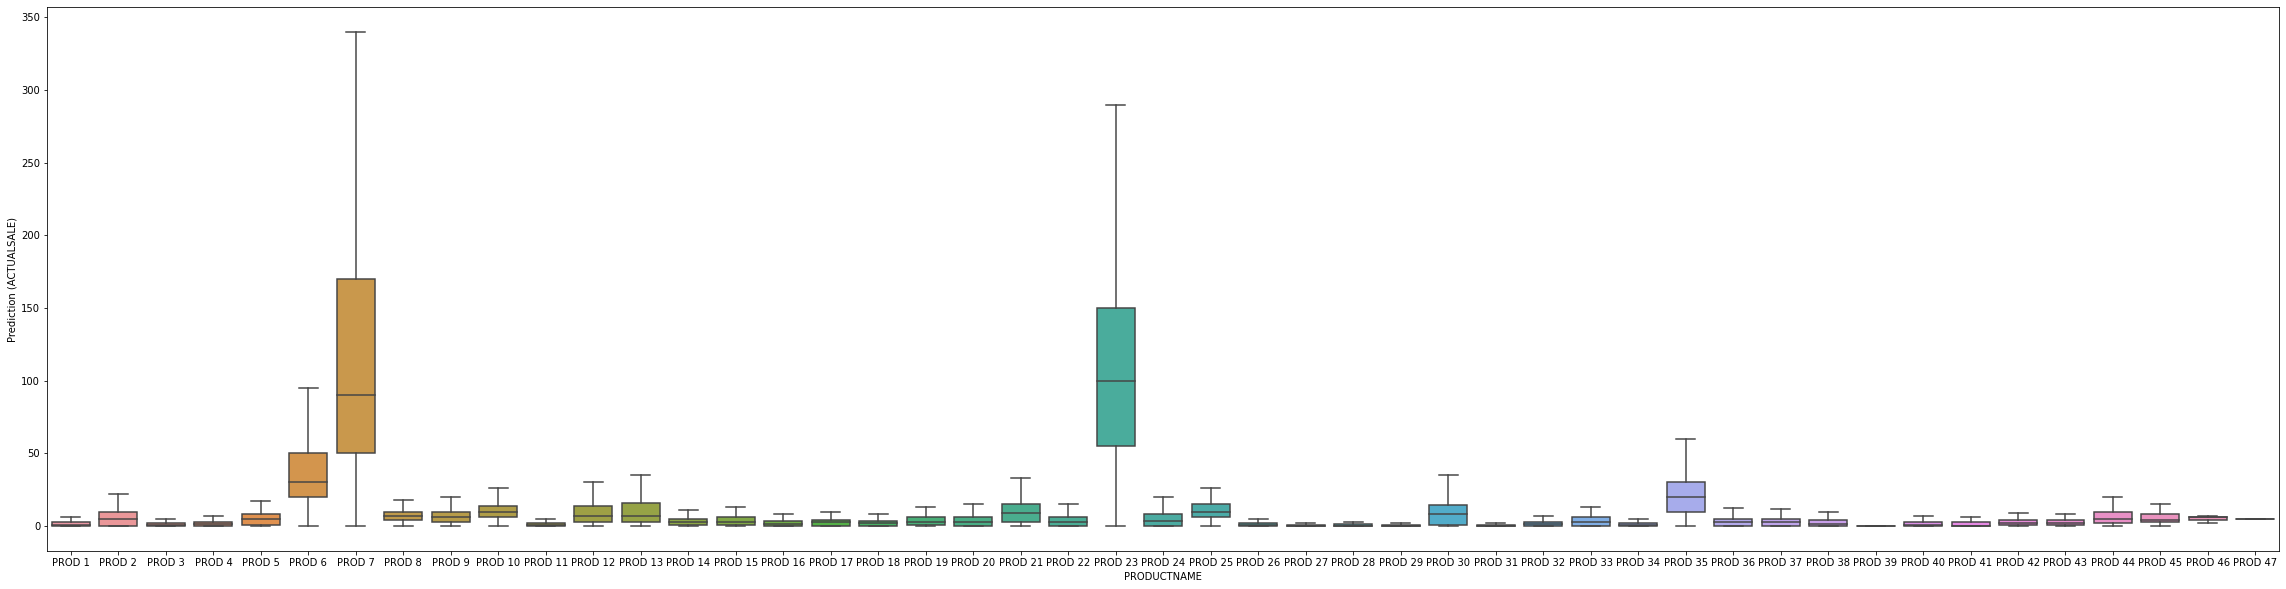

In [21]:
data = df[(df['CUSTOMER'] == 'CUSTOMER A')]
sns.boxplot(y=data['Prediction (ACTUALSALE)'], x=data['PRODUCTNAME'], showfliers = False)

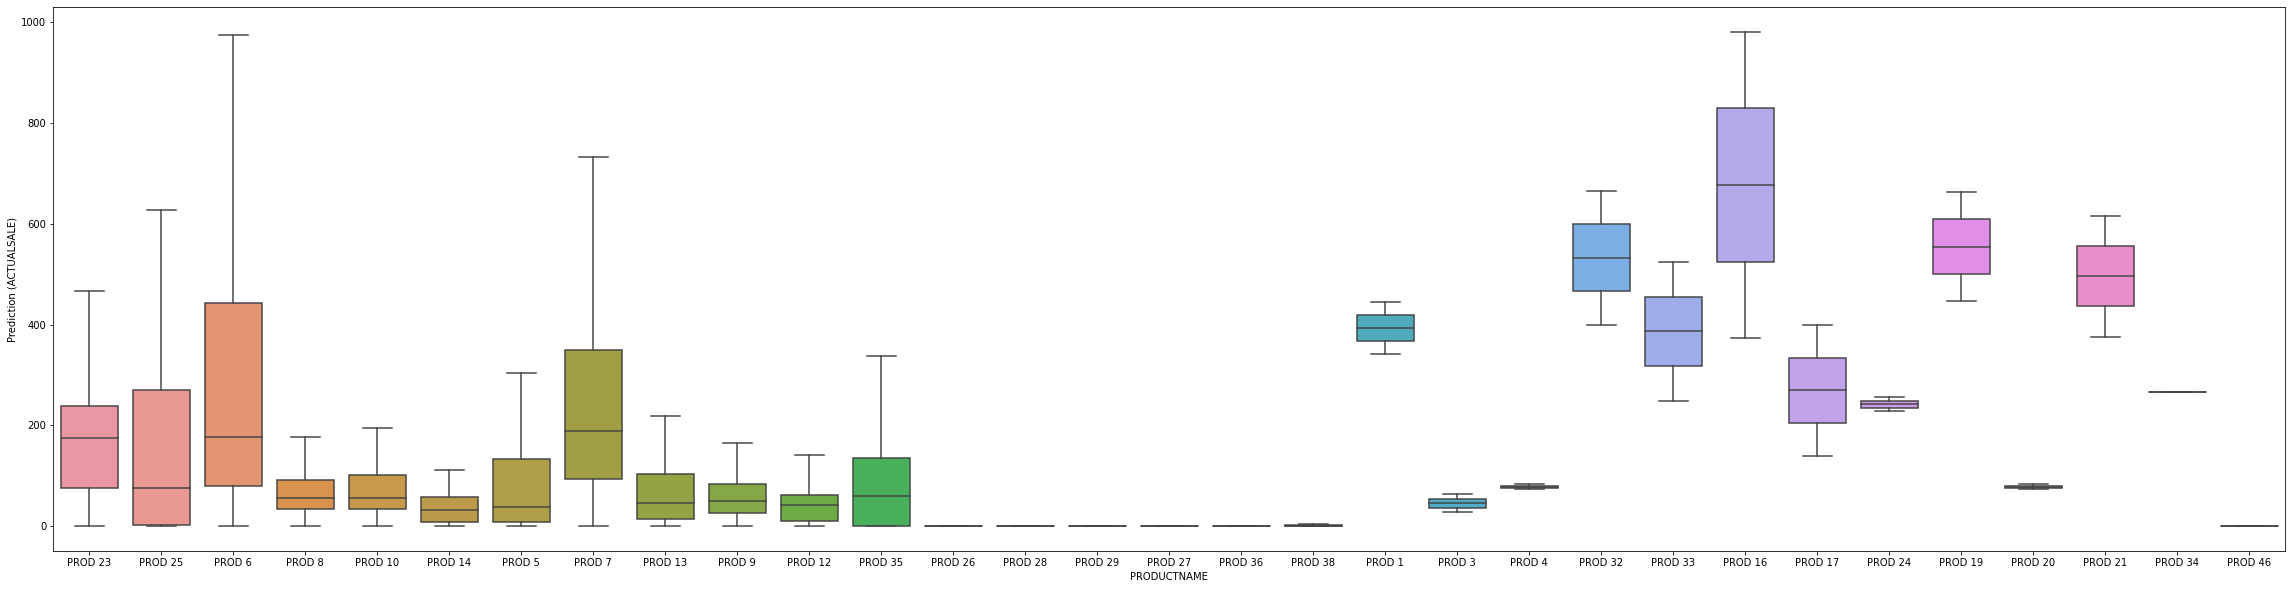

In [22]:
data = df[(df['CUSTOMER'] == 'CUSTOMER B')]
sns.boxplot(y=data['Prediction (ACTUALSALE)'], x=data['PRODUCTNAME'], showfliers = False)

# Running Differential Privacy solution (Laplace mechanism)

In [35]:
def protect_DP(data, epsilon, sensitivity):
    display (f'(e={epsilon}, s={sensitivity})')
    model = diffprivlib.mechanisms.Laplace(epsilon=epsilon, sensitivity=sensitivity)
    data[f'DP Protect (e={epsilon}, s={sensitivity})'] = data.progress_apply(lambda x: model.randomise(x['Prediction (ACTUALSALE)']) ,axis=1)
    return data

In [47]:
data = df.copy()

data = protect_DP(data, epsilon=1, sensitivity=1)
data = protect_DP(data, epsilon=1, sensitivity=5)
data = protect_DP(data, epsilon=1, sensitivity=10)

data = protect_DP(data, epsilon=0.5, sensitivity=1)
data = protect_DP(data, epsilon=0.5, sensitivity=5)
data = protect_DP(data, epsilon=0.5, sensitivity=10)

data = protect_DP(data, epsilon=0.1, sensitivity=1)
data = protect_DP(data, epsilon=0.1, sensitivity=5)
data = protect_DP(data, epsilon=0.1, sensitivity=10)

'(e=1, s=1)'

100%|██████████| 15712/15712 [00:00<00:00, 26093.49it/s]


'(e=1, s=5)'

100%|██████████| 15712/15712 [00:00<00:00, 25921.88it/s]


'(e=1, s=10)'

100%|██████████| 15712/15712 [00:00<00:00, 24056.90it/s]


'(e=0.5, s=1)'

100%|██████████| 15712/15712 [00:00<00:00, 25653.14it/s]


'(e=0.5, s=5)'

100%|██████████| 15712/15712 [00:00<00:00, 22519.01it/s]


'(e=0.5, s=10)'

100%|██████████| 15712/15712 [00:00<00:00, 19240.84it/s]


'(e=0.1, s=1)'

100%|██████████| 15712/15712 [00:00<00:00, 29766.05it/s]


'(e=0.1, s=5)'

100%|██████████| 15712/15712 [00:00<00:00, 28726.83it/s]


'(e=0.1, s=10)'

100%|██████████| 15712/15712 [00:00<00:00, 26922.11it/s]


# Analysis (EXCEL)

In [48]:
data.to_excel('/content/drive/MyDrive/Colab Notebooks/PRIVACY COURSEWORK/DIFFERENTIAL PRIVACY - DATASET - RESULT.xlsx')

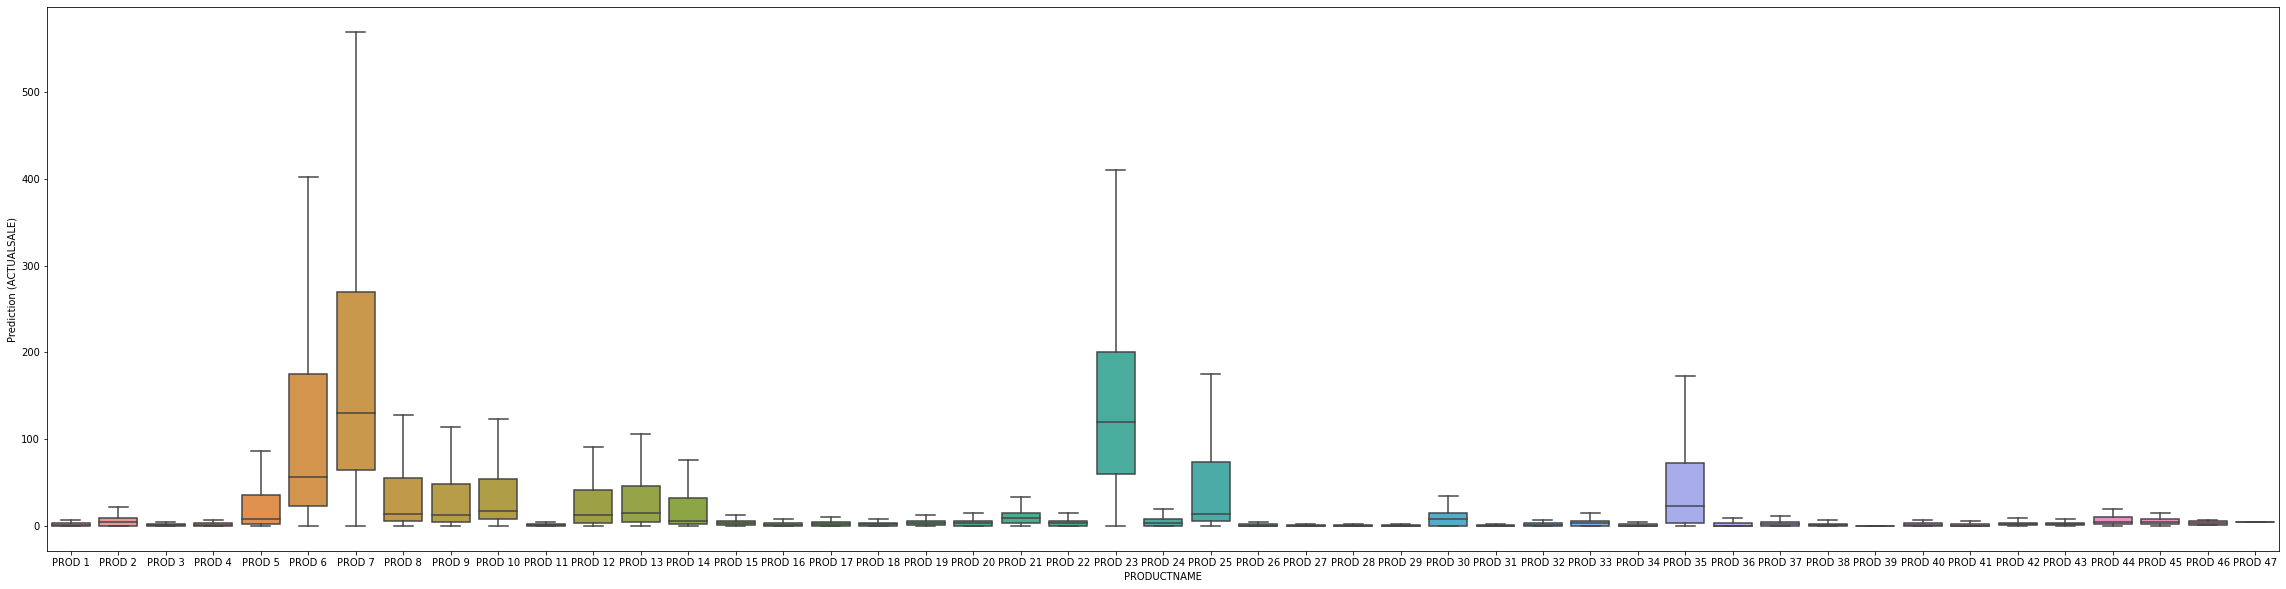

In [49]:
customer_data = df[(df['CUSTOMER'] == 'CUSTOMER B')]
sns.boxplot(y=data['Prediction (ACTUALSALE)'], x=data['PRODUCTNAME'], showfliers = False)

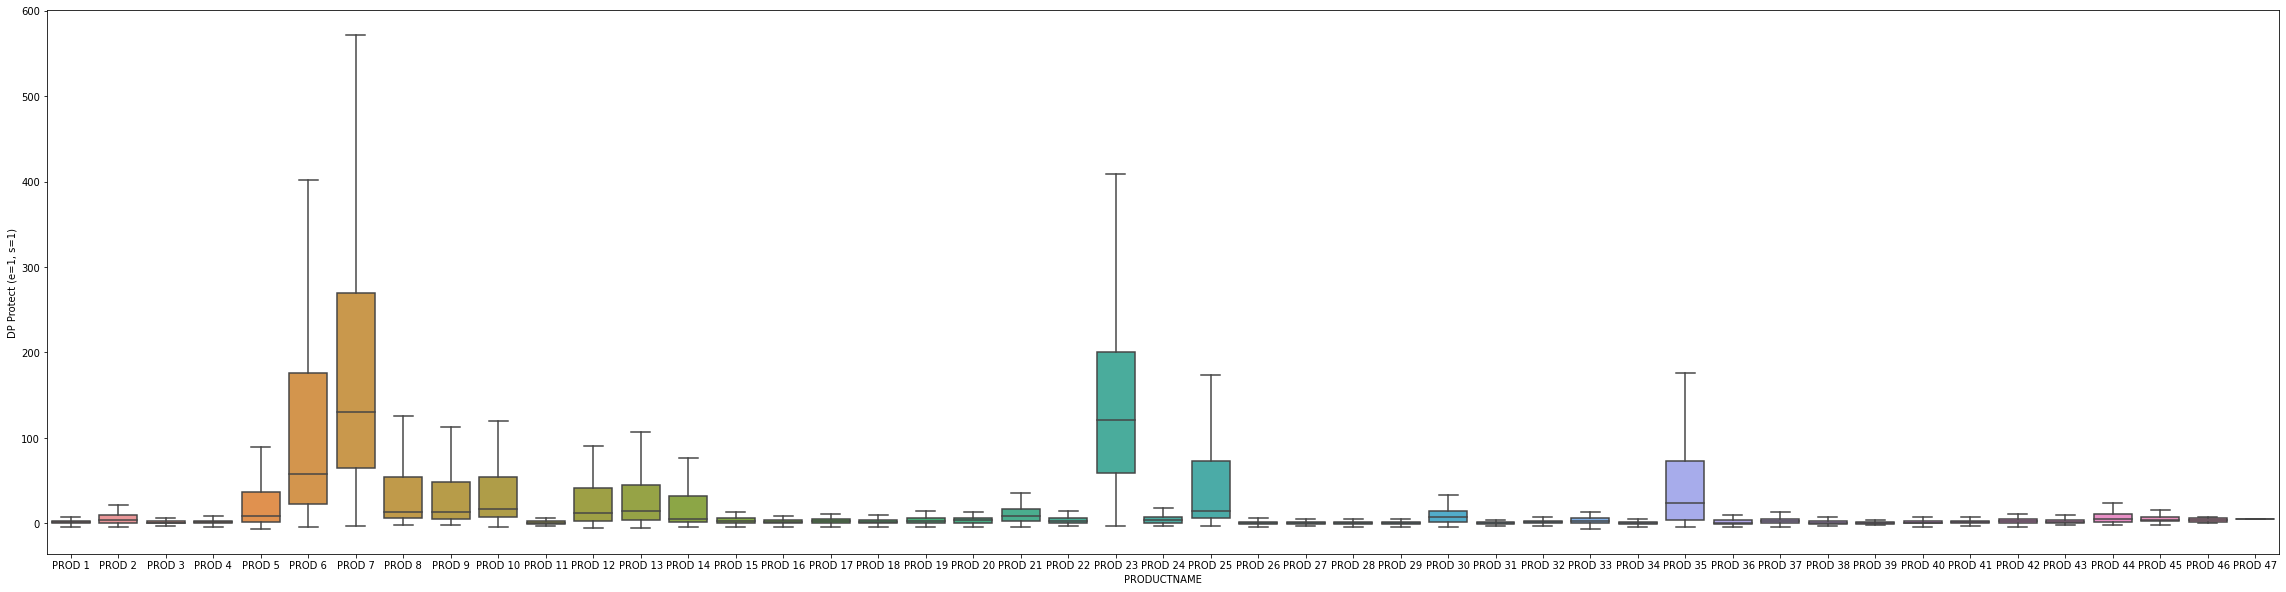

In [50]:
sns.boxplot(y=data['DP Protect (e=1, s=1)'], x=data['PRODUCTNAME'], showfliers = False)

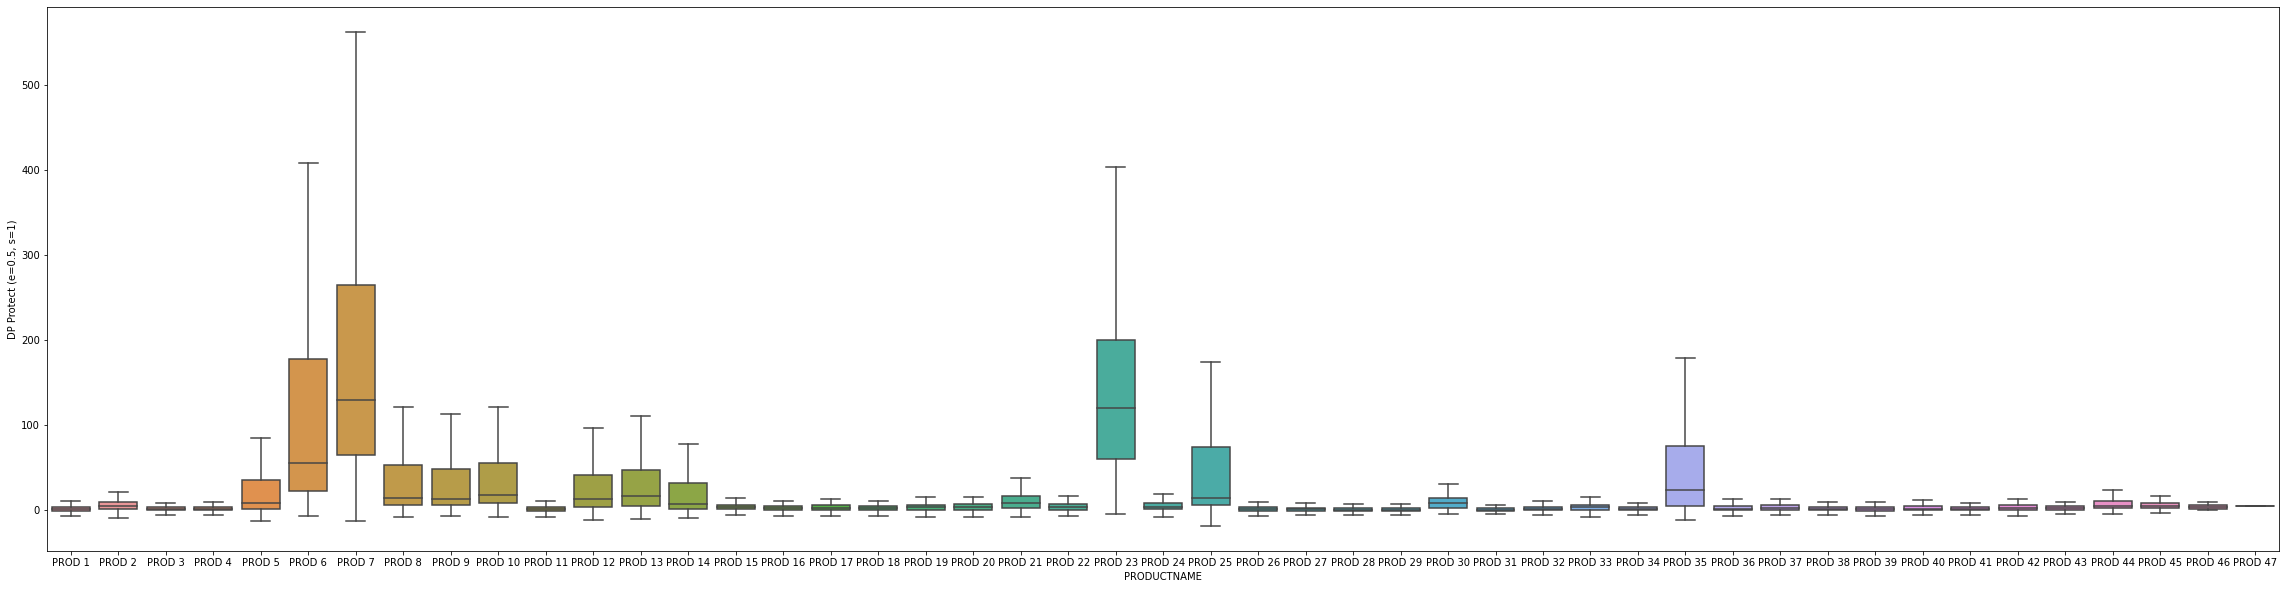

In [51]:
sns.boxplot(y=data['DP Protect (e=0.5, s=1)'], x=data['PRODUCTNAME'], showfliers = False)